In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import time
# from selenium import webdriver
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# 1. 导入数据，探索数据

In [2]:
weather = pd.read_csv(r'/weather.csv',index_col=0)

In [3]:
weather.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No


In [3]:
# 将特征矩阵和标签分开
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]

In [5]:
X.shape # (142193, 21)

(142193, 21)

In [6]:
# 探索数据类型
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 21 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
dtypes: float64(16), object(5)
memory

In [7]:
# 探索缺失值
X.isnull().mean() # 缺失值所占总值得比例 isnull().sum(全部的True)/X.shape[0]

# 对不同的特征，要思考它的缺失值填补方式

Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
dtype: float64

# 2. 探索处理标签

In [8]:
print(Y.shape) # (142193,)
Y.isnull().sum() # 标签无缺失值

(142193,)


0

In [9]:
# 探索标签的分类
np.unique(Y)

array(['No', 'Yes'], dtype=object)

# 2. 分集，优先探索标签

In [4]:
# 分训练集和测试集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=420)

# 恢复索引
for i in [X_train,X_test,Y_train,Y_test]:
    i.index = range(i.shape[0])

In [11]:
# 是否有样本不平衡问题
Y_train.value_counts()  # Yes:22297  No:77238
print(type(Y_train))
print(Y_train.value_counts()[0]/Y_train.value_counts()[1])  # 3.464053460106741

No     77238
Yes    22297
Name: RainTomorrow, dtype: int64

<class 'pandas.core.series.Series'>
3.464053460106741


In [5]:
# 将标签编码
from sklearn.preprocessing import LabelEncoder

Y_train = pd.Series(LabelEncoder().fit_transform(Y_train))  # 0代表"No" ,1代表"Yes"
Y_test = pd.Series(LabelEncoder().fit_transform(Y_test))

In [13]:
# 标签处理完毕，保存
# Ytrain.to_csv("path")

# 3. 探索特征，开始处理特征矩阵

## 3.1 描述性统计与异常值处理

In [14]:
# 描述性统计
X_train.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T
X_test.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,99092.0,12.179886,6.404463,-8.5,-1.809,1.8,3.9,7.6,12.0,16.8,20.8,25.800,31.9
MaxTemp,99292.0,23.212779,7.110535,-4.1,9.100,12.8,14.5,17.9,22.6,28.2,32.9,40.100,48.1
Rainfall,98535.0,2.348739,8.438048,0.0,0.000,0.0,0.0,0.0,0.0,0.6,6.0,37.400,367.6
Evaporation,56898.0,5.455923,4.164123,0.0,0.400,1.0,1.4,2.6,4.8,7.4,10.2,18.206,86.2
Sunshine,51968.0,7.609452,3.782961,0.0,0.000,0.3,1.5,4.8,8.4,10.6,12.0,13.400,14.3
WindGustSpeed,93045.0,39.988285,13.624007,6.0,15.000,20.0,24.0,31.0,39.0,48.0,57.0,81.000,135.0
WindSpeed9am,98591.0,14.006319,8.922327,0.0,0.000,0.0,4.0,7.0,13.0,19.0,26.0,39.000,130.0
WindSpeed3pm,97698.0,18.633841,8.814635,0.0,2.000,6.0,9.0,13.0,19.0,24.0,30.0,43.000,83.0
Humidity9am,98284.0,68.845265,19.074180,0.0,17.000,34.0,44.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,96953.0,51.497798,20.776461,0.0,9.000,17.0,23.0,37.0,52.0,66.0,79.0,98.000,100.0


,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,42464.0,12.201599,6.400577,-7.6,-1.8,1.8,4.0,7.6,12.0,16.9,20.8,25.800,33.9
MaxTemp,42579.0,23.259442,7.134084,-4.8,9.0,12.8,14.5,18.0,22.7,28.2,33.0,40.300,47.0
Rainfall,42252.0,2.352854,8.528195,0.0,0.0,0.0,0.0,0.0,0.0,0.8,6.0,37.498,371.0
Evaporation,24452.0,5.502172,4.244710,0.0,0.4,1.0,1.4,2.6,4.8,7.4,10.2,18.600,145.0
Sunshine,22409.0,7.660569,3.778036,0.0,0.0,0.4,1.6,4.9,8.5,10.7,12.1,13.400,14.5
WindGustSpeed,39878.0,39.974974,13.506464,7.0,15.0,20.0,24.0,31.0,39.0,48.0,57.0,80.000,135.0
WindSpeed9am,42254.0,13.991882,8.825421,0.0,0.0,0.0,4.0,7.0,13.0,19.0,26.0,39.000,87.0
WindSpeed3pm,41865.0,18.646292,8.777042,0.0,2.0,6.0,9.0,13.0,19.0,24.0,30.0,43.000,87.0
Humidity9am,42135.0,68.840418,18.998023,3.0,18.0,34.0,44.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,41630.0,51.447226,20.847527,1.0,9.0,16.0,23.0,36.0,52.0,66.0,79.0,97.000,100.0


异常值出现时：

① 观察异常值出现的频率，如果只出现的个位数次数，多半是输入错误，直接把异常值删除

② 异常值出现了多次，跟业务人员沟通

③ 当异常值占到总数据量的10%，-把异常值替换成非异常值但是非干扰项，比如0替换，或者用处理缺失值的方法。

④ 比赛中，异常值要根据比赛对数据的要求一个个测试

In [6]:
X_train.shape # (99535, 21)
X_test.shape  # (42658, 21)

# 找寻各个切分的数据集中是否存在异常值
X_train.loc[:,"Cloud9am"].value_counts()  # 找到了一个异常值9
X_train.loc[:,"Cloud3pm"].value_counts()  # 没有异常
X_test.loc[:,"Cloud9am"].value_counts()   # 找到了一个异常值9
X_test.loc[:,"Cloud3pm"].value_counts()   # 找到了一个异常值9


# 找到异常值的索引
X_train.loc[X_train.loc[:,"Cloud9am"] == 9,"Cloud9am"] # 71737
X_test.loc[X_test.loc[:,"Cloud9am"] == 9,"Cloud9am"] # 19646
X_test.loc[X_test.loc[:,"Cloud3pm"] == 9,"Cloud3pm"] # 29632

# 异常值少数存在，可以直接删除
X_train = X_train.drop(index=71737)
Y_train = Y_train.drop(index=71737)
X_test = X_test.drop(index=[19646,29632])
Y_test = Y_test.drop(index=[19646,29632])

# 恢复索引
for i in [X_train,X_test,Y_train,Y_test]:
    i.index = range(i.shape[0])

(99535, 21)

(42658, 21)

7.0    13840
1.0    10839
8.0    10067
0.0     6016
6.0     5667
2.0     4484
3.0     4086
5.0     3902
4.0     3024
9.0        1
Name: Cloud9am, dtype: int64

7.0    12757
1.0    10274
8.0     8607
6.0     6224
2.0     5025
3.0     4753
5.0     4685
4.0     3687
0.0     3441
Name: Cloud3pm, dtype: int64

7.0    5909
1.0    4719
8.0    4322
0.0    2571
6.0    2405
2.0    1958
3.0    1768
5.0    1608
4.0    1349
9.0       1
Name: Cloud9am, dtype: int64

7.0    5295
1.0    4553
8.0    3800
6.0    2645
2.0    2128
3.0    2083
5.0    2058
4.0    1567
0.0    1516
9.0       1
Name: Cloud3pm, dtype: int64

71737    9.0
Name: Cloud9am, dtype: float64

19646    9.0
Name: Cloud9am, dtype: float64

29632    9.0
Name: Cloud3pm, dtype: float64

# 3.2 处理困难特征：日期

In [8]:
X_train.sort_values(by=['Location','Date'])  # 按时间和地点排序
X_train.iloc[:,0].value_counts() # 有重复数据，有3387个不一样的日期
X_train.iloc[:,0].value_counts().count() # 3387

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
13117,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,13.0,15.0,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9
97882,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,13.0,15.0,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5
58565,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,2.0,11.0,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9
42299,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,6.0,13.0,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3
51827,2008-07-07,Adelaide,7.6,11.2,16.2,4.6,1.1,WSW,46.0,WNW,...,17.0,13.0,83.0,88.0,1015.9,1017.9,NaN,NaN,9.8,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16680,2017-06-14,Woomera,4.9,19.6,0.0,1.8,NaN,N,33.0,N,...,7.0,13.0,62.0,36.0,1029.1,1026.2,1.0,NaN,12.4,19.3
57138,2017-06-15,Woomera,7.6,19.2,0.0,3.2,NaN,N,19.0,S,...,6.0,7.0,57.0,36.0,1027.4,1024.3,6.0,4.0,12.4,18.4
17334,2017-06-16,Woomera,11.6,18.9,0.2,NaN,NaN,SSE,24.0,SE,...,11.0,13.0,51.0,38.0,1024.6,1021.9,8.0,8.0,14.0,18.1
62784,2017-06-17,Woomera,9.0,19.4,0.0,4.8,NaN,SSW,33.0,SSW,...,13.0,17.0,70.0,42.0,1026.8,1025.5,2.0,NaN,12.1,18.6


2016-08-16    45
2013-05-05    43
2016-10-29    43
2015-07-07    42
2013-12-21    42
              ..
2008-04-14     1
2007-11-21     1
2008-03-04     1
2008-02-21     1
2008-02-27     1
Name: Date, Length: 3387, dtype: int64

3387

① 产生新特征"RainToday"
如果将日期处理为连续型变量：那算法会人为它是一系列1~3000左右的数字，不会意识到这是日期

如果将日期处理为离散分类型变量：类别太多，有3387类，如果做成哑变量，我们特征的维度会爆炸

考虑日期并不是直接影响我们标签的特征，并且处理日期非常困难，我们直接drop掉“日期”特征(初步思考)

考虑日期当然也和我们的标签有间接影响(昨天的天气可能会影响今天的天气，今天可能会影响昨天的)。

我们从特征"Rainfall"产生"RainToday"特征，即几天是否会下雨。


② 产生新特征"Month"

相比于日期，月份，季节更能直观的影响标签，所以我们人造了一个标签

③ 将"Date"特征去掉

In [7]:
# 新增特征"RainToday"
X_train["Rainfall"].head(20)
X_train.loc[X_train["Rainfall"] >= 1,"RainToday"] = "Yes"
X_train.loc[X_train["Rainfall"] < 1,"RainToday"] = "No"
X_train.loc[X_train["Rainfall"] == np.nan,"RainToday"] = np.nan
X_test.loc[X_test["Rainfall"] >= 1,"RainToday"] = "Yes"
X_test.loc[X_test["Rainfall"] < 1,"RainToday"] = "No"
X_test.loc[X_test["Rainfall"] == np.nan,"RainToday"] = np.nan

# 新增特征"Month"
int(X_train.loc[0,'Date'].split('-')[1])
X_train['Date'] = X_train['Date'].apply(lambda x : int(x.split('-')[1]))
X_train = X_train.rename({'Date':'Month'},axis=1)
X_test['Date'] = X_test['Date'].apply(lambda x : int(x.split('-')[1]))
X_test = X_test.rename({'Date':'Month'},axis=1)

0      0.0
1      4.4
2      0.0
3      3.0
4     10.4
5      0.0
6      0.0
7      0.0
8      0.0
9      1.4
10     4.4
11     0.6
12     NaN
13     NaN
14     0.0
15    11.2
16     3.0
17     0.4
18     0.0
19     1.6
Name: Rainfall, dtype: float64

5

## 3.3 处理困难特征：地点

城市➡城市所在的气候

① 澳大利亚主要城市所对应的气候类型数据  city_climate.csv

② 每个城市的经纬度 cityll.csv

In [33]:
X_train['Location'].value_counts().count()  # 数据集共有49个城市，根据气象台总共有8种气候

49

In [ ]:
# ① 利用爬虫获取每个城市的经纬度，将爬取的城市名称列表放在cityname中
df = pd.DataFrame(index=range(len(cityname))) #创建新dataframe用于存储爬取的数据
driver = webdriver.Chrome() #调用谷歌浏览器
time0 = time.time() 

for num, city in enumerate(cityname): #在城市名称中进行遍历
    
    # 1. 打开谷歌主页
    driver.get('https://www.google.co.uk/webhp?hl=en&sa=X&ved=0ahUKEwimtcX24cTfAhUJE7wKHVkWB5AQPAgH')
    time.sleep(0.3)
    # 2. 锁定谷歌的搜索输入框
    search_box = driver.find_element_by_name('q') 
    # 3. 在输入框中输入“城市” 澳大利亚 经纬度    
    search_box.send_keys('%s Australia Latitude and longitude' % (city))
    # 4. enter，确认开始搜索
    search_box.submit()
    
    result = driver.find_element_by_xpath('//div[@class="Z0LcW"]').text
    resultsplit = result.split(" ") #将爬取的结果用split进行分割
    df.loc[num,"City"] = city #向提前创建好的df中输入爬取的数据，第一列是城市名
    df.loc[num,"Latitude"] = resultsplit[0] #第二列是纬度
    df.loc[num,"Longitude"] = resultsplit[2] #第三列是经度
    df.loc[num,"Latitudedir"] = resultsplit[1] #第四列是纬度的方向
    df.loc[num,"Longitudedir"] = resultsplit[3] #第五列是经度的方向
    print("%i webcrawler successful for city %s" % (num,city)) 
    
time.sleep(1) #全部爬取完毕后，停留1秒钟
driver.quit() #关闭浏览器
print(time.time() - time0)

In [8]:
cityll = pd.read_csv(r"/cityll.csv",index_col=0)
city_climate = pd.read_csv(r"/Cityclimate.csv")

#去掉度数符号
cityll["Latitudenum"] = cityll["Latitude"].apply(lambda x:float(x[:-1]))
cityll["Longitudenum"] = cityll["Longitude"].apply(lambda x:float(x[:-1]))

# 经纬度都一致：南纬东经，将方向舍弃
citylld = cityll.iloc[:,[0,5,6]]

In [10]:
#将city_climate中的气候添加到我们的citylld中
citylld.loc[:,"climate"] = city_climate.iloc[:,-1]

In [43]:
# 得到样本中的城市的经纬度
cityname = X_train.iloc[:,1].value_counts().index.tolist()
df = pd.DataFrame(index=range(len(cityname))) #创建新dataframe用于存储爬取的数据
driver = webdriver.Chrome() #调用谷歌浏览器

time0 = time.time()

for num ,city in enumerate(cityname):
    driver.get('https://www.google.co.uk/webhp?hl=en&sa=X&ved=0ahUKEwimtcX24cTfAhUJE7wKHVkWB5AQPAgH')
    time.sleep(0.3)
    search_box = driver.find_element_by_name('q') #锁定谷歌的搜索输入框
    search_box.send_keys('%s Australia Latitude and longitude' % (city))
    search_box.submit() #enter，确认开始搜索
    result = driver.find_element_by_xpath('//div[@class="Z0LcW"]').text 
    resultsplit = result.split(" ") #将爬取的结果用split进行分割
    df.loc[num,"City"] = city #向提前创建好的df中输入爬取的数据，第一列是城市名
    df.loc[num,"Latitude"] = resultsplit[0] #第二列是经度
    df.loc[num,"Longitude"] = resultsplit[2] #第三列是纬度
    df.loc[num,"Latitudedir"] = resultsplit[1] #第四列是经度的方向
    df.loc[num,"Longitudedir"] = resultsplit[3] #第五列是纬度的方向
    print("%i webcrawler successful for city %s" % (num,city)) 
    
time.sleep(1) #全部爬取完毕后，停留1秒钟
driver.quit() #关闭浏览器
print(time.time() - time0) #打印所需的时间
# df.to_csv(r"path")

,City,Latitudenum,Longitudenum
0,Adelaide,34.9285,138.6007
1,Albany,35.0275,117.8840
2,Albury,36.0737,146.9135
3,Wodonga,36.1241,146.8818
4,AliceSprings,23.6980,133.8807
...,...,...,...
96,Wyndham,15.4825,128.1228
97,Yalgoo,28.3445,116.6851
98,Yulara,25.2335,130.9849
99,Uluru,25.3444,131.0369


In [11]:
samplecity = pd.read_csv(r"/samplecityll.csv",index_col=0)
samplecity["Latitudenum"] = samplecity["Latitude"].apply(lambda x:float(x[:-1]))
samplecity["Longitudenum"] = samplecity["Longitude"].apply(lambda x:float(x[:-1]))
samplecityd = samplecity.iloc[:,[0,5,6]]
samplecityd.head()

,City,Latitudenum,Longitudenum
0,Canberra,35.2809,149.1300
1,Sydney,33.8688,151.2093
2,Perth,31.9505,115.8605
3,Darwin,12.4634,130.8456
4,Hobart,42.8821,147.3272


In [12]:
# 计算距离，并求最近

from math import radians,sin,cos,acos
citylld.loc[:,"slat"] = citylld.iloc[:,1].apply(lambda x : radians(x))
citylld.loc[:,"slon"] = citylld.iloc[:,2].apply(lambda x : radians(x))
samplecityd.loc[:,"elat"] = samplecityd.iloc[:,1].apply(lambda x : radians(x))
samplecityd.loc[:,"elon"] = samplecityd.iloc[:,2].apply(lambda x : radians(x))

import sys
for i in range(samplecityd.shape[0]):
    slat = citylld.loc[:,"slat"]
    slon = citylld.loc[:,"slon"]
    elat = samplecityd.loc[i,"elat"]
    elon = samplecityd.loc[i,"elon"]
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) +
                          np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    city_index = np.argsort(dist)[0]
    #每次计算后，取距离最近的城市，然后将最近的城市和城市对应的气候都匹配到samplecityd中
    samplecityd.loc[i,"closest_city"] = citylld.loc[city_index,"City"]
    samplecityd.loc[i,"climate"] = citylld.loc[city_index,"climate"]
 

   
samplecityd.head()
#查看气候的分布
samplecityd["climate"].value_counts()
#确认无误后，取出样本城市所对应的气候，并保存
locafinal = samplecityd.iloc[:,[0,-1]]
locafinal.columns = ["Location","Climate"]

locafinal = locafinal.set_index(keys='Location')
locafinal.head() # 一列地点，一列气候
# locafinal.to_csv(r"locafinal_path")

# 将"Location"替换成"Climate"
X_train["Location"] = X_train["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))
X_test["Location"] = X_test["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))

X_train = X_train.rename(columns={"Location":"Climate"})
X_test = X_test.rename(columns={"Location":"Climate"})

# 至此，"Location"➡"Climate",还需要编码，打算和其他分类型变量一起

D:\Anaconda\Anaconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


,City,Latitudenum,Longitudenum,elat,elon,closest_city,climate
0,Canberra,35.2809,149.1300,0.615768,2.602810,Canberra,Cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,Warm temperate
2,Perth,31.9505,115.8605,0.557641,2.022147,Perth,Warm temperate
3,Darwin,12.4634,130.8456,0.217527,2.283687,Darwin,"High humidity summer, warm winter"
4,Hobart,42.8821,147.3272,0.748434,2.571345,Hobart,Cool temperate


Warm temperate                       15
Mild temperate                       10
Cool temperate                        9
Hot dry summer, cool winter           6
High humidity summer, warm winter     4
Hot dry summer, warm winter           3
Warm humid summer, mild winter        2
Name: climate, dtype: int64

,Climate
Location,
Canberra,Cool temperate
Sydney,Warm temperate
Perth,Warm temperate
Darwin,"High humidity summer, warm winter"
Hobart,Cool temperate


# 3.4 处理分类型变量：缺失值

连续型：平均数填补

离散型：众数填补(使用训练集上的众数填补训练集和测试集上的离散缺失值)



In [13]:
X_train.isnull().mean()

# 分类型特征(object)
cate = X_train.columns[X_train.dtypes == 'object'].to_list() # ['Climate', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
other_cate = ["Month","Cloud9am","Cloud3pm"]
cate = cate + other_cate

from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
si.fit(X_train.loc[:,cate])

# 用训练集中的众数来同时填补训练集和测试集
X_train.loc[:,cate] = si.transform(X_train.loc[:,cate])
X_test.loc[:,cate] = si.transform(X_test.loc[:,cate])

# 查看分类型特征是否依然存在缺失值
X_train.loc[:,cate].isnull().mean()
X_test.loc[:,cate].isnull().mean()

# 至此，分类型变量填补完毕

Month            0.000000
Climate          0.000000
MinTemp          0.004451
MaxTemp          0.002441
Rainfall         0.010047
Evaporation      0.428356
Sunshine         0.477897
WindGustDir      0.065646
WindGustSpeed    0.065204
WindDir9am       0.070850
WindDir3pm       0.026604
WindSpeed9am     0.009484
WindSpeed3pm     0.018456
Humidity9am      0.012569
Humidity3pm      0.025941
Pressure9am      0.098710
Pressure3pm      0.098489
Cloud9am         0.377851
Cloud3pm         0.402687
Temp9am          0.006108
Temp3pm          0.019370
RainToday        0.010047
dtype: float64

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Month          0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Month          0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

## 3.5 处理分类型变量：将分类型变量编码

In [14]:
#将所有的分类型变量编码为数字，一个类别是一个数字
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
#利用训练集进行fit
oe = oe.fit(X_train.loc[:,cate])
#用训练集的编码结果来编码训练和测试特征矩阵
#在这里如果测试特征矩阵报错，就说明测试集中出现了训练集中从未见过的类别
X_train.loc[:,cate] = oe.transform(X_train.loc[:,cate])
X_test.loc[:,cate] = oe.transform(X_test.loc[:,cate])

## 3.6 处理连续型变量：填补缺失值



In [15]:
# 连续型特征 = 所有特征 - 离散型特征
columns = X_train.columns.to_list()
for i in cate:
    columns.remove(i)

impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")
#用训练集来fit模型
impmean = impmean.fit(X_train.loc[:,columns])
#分别在训练集和测试集上进行均值填补
X_train.loc[:,columns] = impmean.transform(X_train.loc[:,columns])
X_test.loc[:,columns] = impmean.transform(X_test.loc[:,columns])

## 3.7 处理连续型变量：无量纲化


<font color=red>**特征工程环节最后一步**</font>

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(X_train.loc[:,columns])
X_train.loc[:,columns] = ss.transform(X_train.loc[:,columns])
X_test.loc[:,columns] = ss.transform(X_test.loc[:,columns])

# 以下是处理好的训练集和测试集
X_train.head()
X_test.head()
Y_train.head()
Y_test.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,4.0,3.0,-0.513295,-0.001812,-0.279763,-2.821095e-16,-3.249304e-16,0.0,0.456382,0.0,...,0.041918,-0.888743,-1.194718,1.089578e+00,8.156536e-01,7.0,7.0,-0.398308,0.018149,0.0
1,9.0,4.0,-0.528945,-1.156449,0.244324,-2.821095e-16,-3.249304e-16,14.0,-0.378703,13.0,...,0.041918,-0.150100,0.951081,1.015465e+00,1.220093e+00,7.0,7.0,-0.537379,-1.147633,1.0
2,11.0,2.0,-0.638489,0.054512,-0.279763,1.443322e+00,-3.249304e-16,15.0,0.608216,8.0,...,0.041918,-1.785666,-1.779936,-3.694371e-02,1.565679e-01,0.0,0.0,-0.398308,0.032721,0.0
3,0.0,2.0,0.550852,0.491021,0.077569,-2.821095e-16,-3.249304e-16,8.0,0.911883,1.0,...,1.645058,0.430261,0.560936,-1.685141e-14,-1.702940e-14,7.0,7.0,0.374312,0.120154,1.0
4,2.0,2.0,0.488256,0.096755,0.958989,1.316271e+00,-5.522152e-01,12.0,0.076798,13.0,...,0.385448,1.274424,-0.560732,2.743321e-01,6.359030e-01,8.0,7.0,-0.120165,-0.069285,1.0


,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,10.0,6.0,-0.059468,1.814630,-0.279763,6.810169e-01,-3.249304e-16,8.0,1.063716,7.0,...,0.614468,-1.047023,-1.926240,-1.133820e+00,-1.850648e+00,4.0,7.0,0.946050,1.868827,0.0
1,7.0,4.0,-1.092317,-1.156449,-0.279763,-2.821095e-16,-3.249304e-16,6.0,-1.745205,3.0,...,-1.675733,1.327184,0.219559,1.563903e+00,1.459760e+00,7.0,7.0,-1.603594,-1.162205,0.0
2,10.0,6.0,0.848188,0.885288,-0.255941,-2.821095e-16,-3.249304e-16,12.0,1.443301,3.0,...,-0.645142,1.116144,-0.024282,-1.685141e-14,-1.702940e-14,7.0,7.0,0.637002,0.936201,0.0
3,7.0,6.0,-0.215960,-0.353835,-0.279763,-2.821095e-16,-3.249304e-16,7.0,2.050635,7.0,...,-0.187102,-1.047023,-0.707036,-1.258797e-01,-1.579958e-01,8.0,5.0,-0.259236,-0.171291,0.0
4,4.0,2.0,-0.403751,-0.621373,0.220502,-5.894913e-01,-1.497922e-01,13.0,-0.682370,7.0,...,-0.874163,1.168904,0.512168,-2.592836e-01,1.865263e-01,2.0,7.0,-0.738261,-0.564742,1.0


0    0
1    1
2    0
3    1
4    0
dtype: int32

0    1
1    0
2    1
3    0
4    0
dtype: int32

# 4. 模型

## 4.1 建模与评估



In [22]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,recall_score,precision_score

In [153]:
time0 = time()

# 选择核函数 
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 8000
             ).fit(X_train, Y_train)
    result = clf.predict(xtest)
    score = clf.score(xtest,ytest) # return accuracy
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest,clf.decision_function(xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    
# 查看结果，得知数据集有极大可能是线性的，选择线性核函数！

linear 's testing accuracy 0.834000, recall is 0.428571', auc is 0.864325
00:06:521408
poly 's testing accuracy 0.835333, recall is 0.428571', auc is 0.864374
00:07:407138
rbf 's testing accuracy 0.812667, recall is 0.297619', auc is 0.815558
00:09:597004
sigmoid 's testing accuracy 0.653333, recall is 0.175595', auc is 0.459860
00:10:410488


## 4.2 模型调参

思考两个目标：

① 不计一切代价判断出少数类，得到较高的Recall

② 达到recall，ROC和accuracy之间的平衡，不追求任何一个也不牺牲任何一个


### 4.2.1 追求最高的Recall

方法：利用参数"class_weight"调节样本的权重

① 先让"class_weight = 'balanced'"

② 再让"class_weight = {1:10}"

①与②给予了少数样本不同程度的权重，②最重

结论：给少数类的权重越大，Recall会越高，准确率越低。原因：少数类的权重越大，模型会想尽办法捕捉少数类，这时，把多数类判断成少数类的情况大大增加。

In [154]:
# class_weight = 'balanced'
time0 = time()
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 5000
             ,class_weight = "balanced"
             ).fit(X_train, Y_train)
    result = clf.predict(xtest)
    score = clf.score(xtest,ytest)
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest,clf.decision_function(xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    
# accuracy 0.785333, recall is 0.785714', auc is 0.866097

linear 's testing accuracy 0.785333, recall is 0.785714', auc is 0.866097
00:07:422521
poly 's testing accuracy 0.788667, recall is 0.779762', auc is 0.866808
00:08:621238
rbf 's testing accuracy 0.786667, recall is 0.642857', auc is 0.811753
00:11:131637
sigmoid 's testing accuracy 0.528667, recall is 0.375000', auc is 0.459233
00:13:281479


In [155]:
# class_weight = {1:10}
time0 = time()
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 5000
             ,class_weight = {1:10} # "1"类的样本权重为10，隐含"0"类的样本权重为1
             ).fit(X_train, Y_train)
    result = clf.predict(xtest)
    score = clf.score(xtest,ytest)
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest,clf.decision_function(xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    
# accuracy 0.622000, recall is 0.934524', auc is 0.865557

linear 's testing accuracy 0.622000, recall is 0.934524', auc is 0.865557
00:13:007972
poly 's testing accuracy 0.617333, recall is 0.934524', auc is 0.865417
00:14:777623
rbf 's testing accuracy 0.772667, recall is 0.607143', auc is 0.793595
00:17:695089
sigmoid 's testing accuracy 0.224000, recall is 1.000000', auc is 0.458868
00:19:946837


### 4.2.2 追求平衡

① 调节SVM惩罚参数C，结论：调节C值不能使模型的任何指标实现质变，原因可能是模型做了样本权重的平衡

② 确定最优的影响ROC曲线的阈值

两个都不能使模型有质的提升

under C 0.010000, testing accuracy is 0.788000,recall is 0.776786', auc is 0.865581
00:00:894578
under C 1.120000, testing accuracy is 0.785333,recall is 0.785714', auc is 0.866064
00:08:126524
under C 2.230000, testing accuracy is 0.785333,recall is 0.788690', auc is 0.866010
00:14:473748
under C 3.340000, testing accuracy is 0.785333,recall is 0.788690', auc is 0.866028
00:20:427678
under C 4.450000, testing accuracy is 0.785333,recall is 0.788690', auc is 0.866023
00:27:676171
under C 5.560000, testing accuracy is 0.784667,recall is 0.785714', auc is 0.865949
00:33:327623
under C 6.670000, testing accuracy is 0.784667,recall is 0.788690', auc is 0.866056
00:38:722636
under C 7.780000, testing accuracy is 0.784667,recall is 0.788690', auc is 0.865974
00:45:006904
under C 8.890000, testing accuracy is 0.784667,recall is 0.788690', auc is 0.866023
00:50:621402
under C 10.000000, testing accuracy is 0.784667,recall is 0.785714', auc is 0.866015
00:57:541974
0.8660637579774179 1.12


<Figure size 432x288 with 0 Axes>

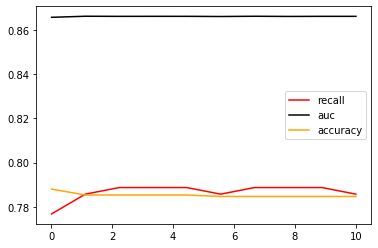

In [164]:
from time import time
C_range = np.linspace(0.01,10,10)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C,cache_size = 5000
             ,class_weight = "balanced"
             ).fit(X_train, Y_train)
    result = clf.predict(xtest)
    score = clf.score(xtest,ytest)
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest,clf.decision_function(xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" %
(C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
    

print(max(aucall),C_range[aucall.index(max(aucall))])  # 0.8660637579774179   1.12
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend()
plt.show()

In [166]:
# 将最佳C值代入模型
times = time()
clf = SVC(kernel = "linear",C=1.12,cache_size = 8000
         ,class_weight = "balanced"
         ).fit(X_train, Y_train)
result = clf.predict(xtest)
score = clf.score(xtest,ytest)
recall = recall_score(ytest, result)
auc = roc_auc_score(ytest,clf.decision_function(xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

# SVM模型本身的参数不能满足需求

testing accuracy 0.785333,recall is 0.785714', auc is 0.866064
00:08:259267


In [ ]:
from sklearn.metrics import roc_curve as ROC

FPR , Recall , thresholds = ROC(ytest,clf.decision_function(xtest),pos_label=1)
area = roc_auc_score(ytest,clf.decision_function(xtest))
plt.figure()
plt.plot(FPR, Recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [188]:
# 选出最佳阈值："约登指数"
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]

from sklearn.metrics import accuracy_score as AC,f1_score
times = time()
clf = SVC(kernel = "linear",C=3,cache_size = 5000
         ,class_weight = "balanced"
         ).fit(X_train, Y_train)
prob = pd.DataFrame(clf.decision_function(xtest))
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0
# prob.loc[:,"y_pred"].isnull().sum()
#检查模型本身的准确度
score = AC(ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(ytest, prob.loc[:,"y_pred"])
f1_score = f1_score(ytest,clf.predict(xtest))
print("testing accuracy %f,recall is %f, f1-score is %f" % (score,recall,f1_score))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

-0.13029681723370312

testing accuracy 0.770667,recall is 0.827381, f1-score is 0.622066
00:19:092340


,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,5.0,3.0,-0.513295,-0.001812,-0.279763,-1.112805e-16,-3.381444e-17,0.0,0.456382,0.0,...,0.041918,-0.888743,-1.194718,1.089578e+00,8.156536e-01,7.0,7.0,-0.398308,0.018149,0.0
1,10.0,4.0,-0.528945,-1.156449,0.244324,-1.112805e-16,-3.381444e-17,14.0,-0.378703,13.0,...,0.041918,-0.150100,0.951081,1.015465e+00,1.220093e+00,7.0,7.0,-0.537379,-1.147633,1.0
2,12.0,2.0,-0.638489,0.054512,-0.279763,1.443322e+00,-3.381444e-17,15.0,0.608216,8.0,...,0.041918,-1.785666,-1.779936,-3.694371e-02,1.565679e-01,0.0,0.0,-0.398308,0.032721,0.0
3,1.0,2.0,0.550852,0.491021,0.077569,-1.112805e-16,-3.381444e-17,8.0,0.911883,1.0,...,1.645058,0.430261,0.560936,4.037264e-15,-4.226633e-14,7.0,7.0,0.374312,0.120154,1.0
4,3.0,2.0,0.488256,0.096755,0.958989,1.316271e+00,-5.522152e-01,12.0,0.076798,13.0,...,0.385448,1.274424,-0.560732,2.743321e-01,6.359030e-01,8.0,7.0,-0.120165,-0.069285,1.0


# 5. 使用随机森林

In [2]:
# 随机森林初步探索
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,class_weight="balanced").fit(X_train,Y_train)
rfc_accuracy = rfc.score(xtest,ytest)
rfc_auc = roc_auc_score(ytest,clf.decision_function(xtest))
print("RandomForestClassifier's accuracy on dataset is {}".format(rfc_accuracy))
print("RandomForestClassifier's auc on dataset is {}".format(rfc_auc))

RandomForestClassifier's accuracy on dataset is 0.84
RandomForestClassifier's auc on dataset is 90.13


## 5.1 调节超参数n_estimators

0.8381997527990113 51


<Figure size 1440x360 with 0 Axes>

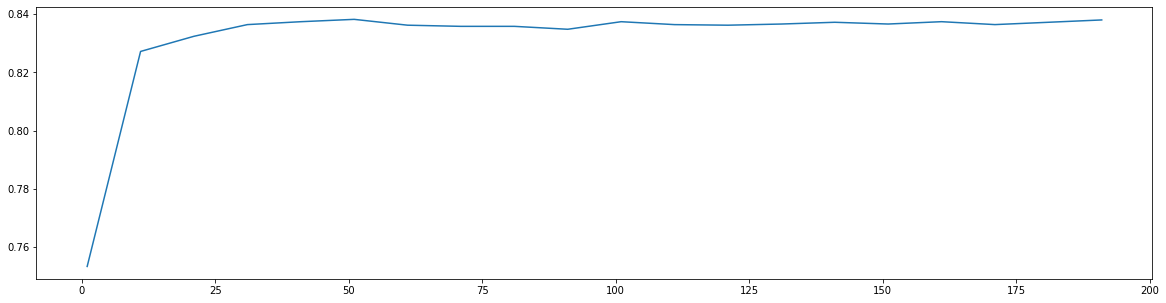

In [264]:
# 大致确定一下范围
score_list = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X_train,Y_train,cv=10).mean()
    score_list.append(score)
print(max(score_list),(score_list.index(max(score_list))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),score_list)
plt.show()

## 5.2 其他参数调节

0.8396001584006335 39


<Figure size 1440x360 with 0 Axes>

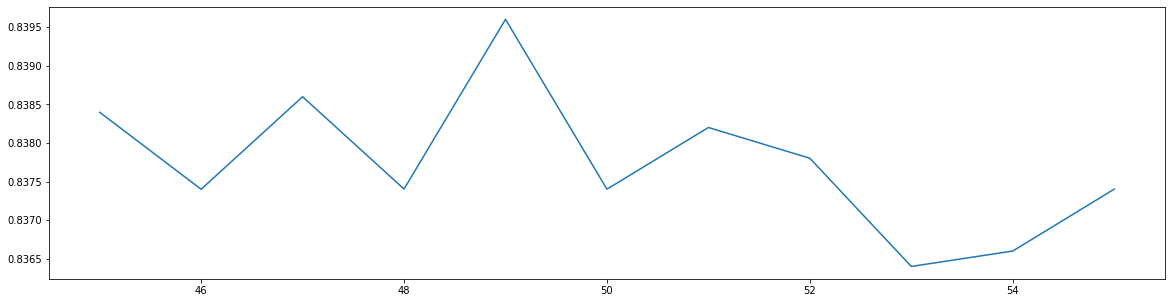

The best n_estimators is 49


In [268]:
# 细化范围
scorel = []
for i in range(45,56):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X_train,Y_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(45,56),scorel)
plt.show()
print("The best n_estimators is {}".format(45+scorel.index(max(scorel))))

In [25]:
# 网格搜索其他参数
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators=49,
                                 n_jobs=-1,
                                 random_state=90)
para_dict = {
    'max_depth':np.arange(12, 20, 1),
    'criterion':['gini', 'entropy'],
    'max_leaf_nodes':np.arange(25,50,1),
    'max_features':np.arange(5,20,1)
            }

grid = GridSearchCV(rfc,para_dict,cv = 6,n_jobs = -1)
grid.fit(X_train,Y_train)

best_rfc = grid.best_estimator_
best_accuracy = best_rfc.score(X_test,Y_test)
best_accuracy

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=49, n_jobs=-1,
                                              oob_score=False, random_state=90,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterio

# 6. 使用XGBoost

① subsample不稳定

② eta(shrinkage、learning rate)不建议调，推荐参考值(xgb.train里是0.3，xgb.XGBClassfier里是0.1)

③ 不调正则化项的系数

④ gamma：决定要不要分枝的tol

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier as XGBC
from sklearn.model_selection import cross_val_score as CVS

In [114]:
xgb_c = XGBC(n_estimators=357,gamma=1.1345).fit(X_train,Y_train)

xgb_acc = xgb_c.score(X_test,Y_test)

print(xgb_acc) # 准确率：0.9603103900975244

0.9603103900975244


In [133]:
from sklearn.metrics import f1_score,roc_auc_score
xgb_f1 = f1_score(Y_test,xgb_c.predict(X_test))
xgb_auc = roc_auc_score(Y_test,xgb_c.predict_proba(X_test)[:,-1])
print('xgb_f1:{}  |  xgb_auc:{}'.format(xgb_f1,xgb_auc))

xgb_f1:0.9060436206226761  |  xgb_auc:0.9907850153287767


In [ ]:
# 绘制n_estimator的学习曲线
axisx = range(50,1000,50)
rs = []
for i in axisx:
    xgb_c = XGBC(n_estimators=i,random_state=420)
    rs.append(CVS(xgb_c,X_train,Y_train,cv=5).mean())
    
print('best n_estimators:{} \nbest accuracy:{}'.format(axisx[rs.index(max(rs))],max(rs))) 
# best n_estimators:357
# best accuracy:0.9603103900975244

plt.plot(axisx,rs_c,c="red",label="XGB")
plt.legend()
plt.show()